# 1. Test sur un fichier

In [1]:
import pandas as pd
import numpy as np

# rawdf = pd.read_csv('ENV_01-03-2023_01h32m30s - ENV_01-03-2023_01h32m30s.csv.csv')
rawdf = pd.read_excel('./data/ENV_01-03-2023/ENV_01-03-2023_01h32m30s.xlsx')

rawdf

,Timestamp,Secondes,DataType,ScienceDome,LowerDeck,UpperDeck,GreenHab,RAM
0,01-03-23_01:33:21,28923.449821,T,-1,19.53,184.08,29.81,0.53
1,01-03-23_01:33:21,28923.449821,P,-1,8530.80,-1058.07,8539.57,8533.04
2,01-03-23_01:33:21,28923.449821,H,-1,20.57,100.00,18.74,62.32
3,01-03-23_01:33:21,28923.449821,V,-1,1.00,0.00,1.00,1.00
4,01-03-23_01:33:21,28923.449821,FS,-1,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...
415,01-03-23_02:32:21,32463.851665,H,-1,22.12,100.00,29.04,-1.00
416,01-03-23_02:32:21,32463.851665,V,-1,2.00,65535.00,0.00,-1.00
417,01-03-23_02:32:21,32463.851665,FS,-1,2.00,0.00,0.00,-1.00
418,01-03-23_02:32:21,32463.851665,INF,-1,0.00,1.00,0.00,-1.00


In [2]:
nfeatures = rawdf.shape[1]-3
nstamps = len(rawdf['Timestamp'].value_counts())
nrows_per_stamp = len(rawdf[rawdf['Timestamp'] == '01-03-23_02:32:21'])
nrows_total = rawdf.shape[0]

In [3]:
# Mise en forme

numpydf = np.zeros((nstamps,nrows_per_stamp*nfeatures))
row_labels = []
columns_labels = ['ScienceDome T','LowerDeck T','UpperDeck T','GreenHab T','RAM T','ScienceDome P','LowerDeck P','UpperDeck P','GreenHab P','RAM P','ScienceDome H','LowerDeck H','UpperDeck H','GreenHab H','RAM H','ScienceDome V','LowerDeck V','UpperDeck V','GreenHab V','RAM V','ScienceDome FS','LowerDeck FS','UpperDeck FS','GreenHab FS','RAM FS','ScienceDome INF','LowerDeck INF','UpperDeck INF','GreenHab INF','RAM INF','ScienceDome LUM','LowerDeck LUM','UpperDeck LUM','GreenHab LUM','RAM LUM']
                  
current_stamp = 0
row_counter = 0

for row in range(nrows_total) :
    row_counter += 1
    
    for j in range(3,nfeatures+3) :
        
        x = rawdf.iloc[row,j]
                
        if isinstance(x,str) :
            x = float(x.replace(',','.'))
            numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x
        else :
            x = float(x)
            numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x
        
    if (row_counter >= nrows_per_stamp) :
        row_labels.append(rawdf['Timestamp'].iloc[int(current_stamp*nrows_total/nstamps)])
        current_stamp += 1
        row_counter = 0
        
df = pd.DataFrame(numpydf)
df.columns = columns_labels
df.index = row_labels

In [4]:
df

,ScienceDome T,LowerDeck T,UpperDeck T,GreenHab T,RAM T,ScienceDome P,LowerDeck P,UpperDeck P,GreenHab P,RAM P,...,ScienceDome INF,LowerDeck INF,UpperDeck INF,GreenHab INF,RAM INF,ScienceDome LUM,LowerDeck LUM,UpperDeck LUM,GreenHab LUM,RAM LUM
01-03-23_01:33:21,-1.0,19.53,184.08,29.81,0.53,-1.0,8530.80,-1058.07,8539.57,8533.04,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.16,0.00,0.16,0.16
01-03-23_01:34:21,-1.0,19.57,184.08,30.15,0.52,-1.0,8530.99,-1058.07,8539.58,8533.49,...,-1.0,1.0,1.0,0.0,0.0,-1.0,0.08,0.00,0.16,0.16
01-03-23_01:35:21,-1.0,19.59,184.08,30.33,0.51,-1.0,8530.37,-1058.07,8539.12,8533.36,...,-1.0,0.0,0.0,0.0,0.0,-1.0,0.16,0.16,0.16,0.16
01-03-23_01:36:21,-1.0,19.58,184.08,30.44,0.49,-1.0,8530.37,-1058.07,8539.00,8533.14,...,-1.0,1.0,0.0,0.0,0.0,-1.0,0.08,0.16,NaN,0.16
01-03-23_01:37:21,-1.0,19.57,184.08,30.52,0.47,-1.0,8529.61,-1058.07,8538.83,8533.27,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.33,inf,NaN,0.16
01-03-23_01:38:21,-1.0,19.52,184.08,30.85,0.46,-1.0,8530.07,-1058.07,8538.86,8532.90,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.16,0.00,NaN,NaN
01-03-23_01:39:21,-1.0,19.45,184.08,31.12,0.45,-1.0,8529.75,-1058.07,8538.79,8532.15,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.16,0.00,0.16,0.16
01-03-23_01:40:21,-1.0,19.36,184.08,31.24,0.44,-1.0,8529.96,-1058.07,8538.56,8532.79,...,-1.0,0.0,0.0,0.0,0.0,-1.0,0.16,0.16,0.16,0.16
01-03-23_01:41:21,-1.0,19.32,184.08,30.66,0.44,-1.0,8530.02,-1058.07,8538.74,8533.00,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.16,0.00,0.16,0.16
01-03-23_01:42:21,-1.0,19.18,184.08,29.60,0.43,-1.0,8530.33,-1058.07,8539.30,8533.06,...,-1.0,1.0,1.0,0.0,0.0,-1.0,0.08,0.00,NaN,NaN


In [5]:
# Vérification

value = 0
print((rawdf['RAM'] == value).sum())
print((df['RAM T'] == value).sum()+(df['RAM P'] == value).sum()+(df['RAM H'] == value).sum()+(df['RAM V'] == value).sum()+(df['RAM FS'] == value).sum()+(df['RAM INF'] == value).sum()+(df['RAM LUM'] == value).sum())

81
81


# 2. Traitement de tous les fichiers d'une journée

In [6]:
import os

folder_path = './data/ENV_01-03-2023'

filenames = []

for filename in os.listdir(folder_path):
    filenames.append(filename)
    
print(filenames)

['ENV_01-03-2023_00h32m30s.xlsx', 'ENV_01-03-2023_01h32m30s.xlsx', 'ENV_01-03-2023_02h32m34s.xlsx', 'ENV_01-03-2023_03h33m31s.xlsx', 'ENV_01-03-2023_04h33m36s.xlsx', 'ENV_01-03-2023_05h33m36s.xlsx', 'ENV_01-03-2023_06h33m36s.xlsx', 'ENV_01-03-2023_07h33m37s.xlsx', 'ENV_01-03-2023_08h33m37s.xlsx', 'ENV_01-03-2023_09h33m40s.xlsx', 'ENV_01-03-2023_10h34m40s.xlsx', 'ENV_01-03-2023_11h35m38s.xlsx', 'ENV_01-03-2023_12h36m35s.xlsx', 'ENV_01-03-2023_13h36m35s.xlsx', 'ENV_01-03-2023_14h36m36s.xlsx', 'ENV_01-03-2023_15h37m33s.xlsx', 'ENV_01-03-2023_16h37m37s.xlsx', 'ENV_01-03-2023_17h38m12s.xlsx', 'ENV_01-03-2023_18h39m12s.xlsx', 'ENV_01-03-2023_19h39m19s.xlsx', 'ENV_01-03-2023_20h39m19s.xlsx', 'ENV_01-03-2023_21h39m20s.xlsx', 'ENV_01-03-2023_22h39m20s.xlsx', 'ENV_01-03-2023_23h40m18s.xlsx']


In [7]:
def excelToDataframe(filename) :
    rawdf = pd.read_excel('./data/ENV_01-03-2023/'+filename)
    
    print('Processing file '+filename)
    
    nfeatures = rawdf.shape[1]-3
    nstamps = len(rawdf['Timestamp'].value_counts())
    nrows_per_stamp = len(rawdf[rawdf['Timestamp'] == str(rawdf['Timestamp'].iloc[-1])])
    nrows_total = rawdf.shape[0]
        
    numpydf = np.zeros((nstamps,nrows_per_stamp*nfeatures))
    row_labels = []
    columns_labels = ['ScienceDome T','LowerDeck T','UpperDeck T','GreenHab T','RAM T','ScienceDome P','LowerDeck P','UpperDeck P','GreenHab P','RAM P','ScienceDome H','LowerDeck H','UpperDeck H','GreenHab H','RAM H','ScienceDome V','LowerDeck V','UpperDeck V','GreenHab V','RAM V','ScienceDome FS','LowerDeck FS','UpperDeck FS','GreenHab FS','RAM FS','ScienceDome INF','LowerDeck INF','UpperDeck INF','GreenHab INF','RAM INF','ScienceDome LUM','LowerDeck LUM','UpperDeck LUM','GreenHab LUM','RAM LUM']

    current_stamp = 0
    row_counter = 0

    for row in range(nrows_total) :
        row_counter += 1

        for j in range(3,nfeatures+3) :

            x = rawdf.iloc[row,j]

            if isinstance(x,str) :
                x = float(x.replace(',','.'))
                numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x
            else :
                x = float(x)
                numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x

        if (row_counter >= nrows_per_stamp) :
            row_labels.append(rawdf['Timestamp'].iloc[int(current_stamp*nrows_total/nstamps)])
            current_stamp += 1
            row_counter = 0

    df = pd.DataFrame(numpydf)
    df.columns = columns_labels
    df.index = row_labels
    
    return(df)

In [8]:
df = excelToDataframe(filenames[0])
for filename in filenames[1:] :
    df = pd.concat([df,excelToDataframe(filename)])          

Processing file ENV_01-03-2023_00h32m30s.xlsx
Processing file ENV_01-03-2023_01h32m30s.xlsx
Processing file ENV_01-03-2023_02h32m34s.xlsx
Processing file ENV_01-03-2023_03h33m31s.xlsx
Processing file ENV_01-03-2023_04h33m36s.xlsx
Processing file ENV_01-03-2023_05h33m36s.xlsx
Processing file ENV_01-03-2023_06h33m36s.xlsx
Processing file ENV_01-03-2023_07h33m37s.xlsx
Processing file ENV_01-03-2023_08h33m37s.xlsx
Processing file ENV_01-03-2023_09h33m40s.xlsx
Processing file ENV_01-03-2023_10h34m40s.xlsx
Processing file ENV_01-03-2023_11h35m38s.xlsx
Processing file ENV_01-03-2023_12h36m35s.xlsx
Processing file ENV_01-03-2023_13h36m35s.xlsx
Processing file ENV_01-03-2023_14h36m36s.xlsx
Processing file ENV_01-03-2023_15h37m33s.xlsx
Processing file ENV_01-03-2023_16h37m37s.xlsx
Processing file ENV_01-03-2023_17h38m12s.xlsx
Processing file ENV_01-03-2023_18h39m12s.xlsx
Processing file ENV_01-03-2023_19h39m19s.xlsx
Processing file ENV_01-03-2023_20h39m19s.xlsx
Processing file ENV_01-03-2023_21h

In [9]:
df

,ScienceDome T,LowerDeck T,UpperDeck T,GreenHab T,RAM T,ScienceDome P,LowerDeck P,UpperDeck P,GreenHab P,RAM P,...,ScienceDome INF,LowerDeck INF,UpperDeck INF,GreenHab INF,RAM INF,ScienceDome LUM,LowerDeck LUM,UpperDeck LUM,GreenHab LUM,RAM LUM
01-03-23_00:33:20,-1.0,17.83,184.08,19.66,0.89,-1.0,8534.51,-1058.07,8544.79,8536.84,...,-1.0,1.0,92.0,0.0,0.0,-1.0,0.52,48.99,NaN,NaN
01-03-23_00:34:20,-1.0,17.94,184.08,19.33,0.89,-1.0,8534.97,-1058.07,8545.34,8537.12,...,-1.0,1.0,92.0,0.0,0.0,-1.0,0.37,48.67,NaN,0.16
01-03-23_00:35:20,-1.0,18.01,184.08,19.00,0.88,-1.0,8535.12,-1058.07,8545.38,8537.49,...,-1.0,1.0,82.0,0.0,0.0,-1.0,0.68,44.23,NaN,NaN
01-03-23_00:36:20,-1.0,18.02,184.08,18.70,0.87,-1.0,8535.35,-1058.07,8545.73,8537.47,...,-1.0,1.0,90.0,0.0,0.0,-1.0,0.52,47.63,0.16,0.16
01-03-23_00:37:20,-1.0,18.06,184.08,18.41,0.86,-1.0,8535.14,-1058.07,8546.11,8537.50,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.16,inf,NaN,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02-03-23_00:36:05,-1.0,19.84,21.10,28.27,-1.00,-1.0,8549.95,8544.96,8557.59,-1.00,...,-1.0,0.0,11.0,0.0,-1.0,-1.0,0.33,4.19,0.16,-1.00
02-03-23_00:37:05,-1.0,19.88,21.12,28.60,-1.00,-1.0,8549.70,8544.84,8557.50,-1.00,...,-1.0,0.0,10.0,0.0,-1.0,-1.0,0.33,4.44,0.16,-1.00
02-03-23_00:38:05,-1.0,19.92,21.12,28.84,-1.00,-1.0,8548.90,8545.10,8557.43,-1.00,...,-1.0,0.0,11.0,0.0,-1.0,-1.0,0.33,4.19,NaN,-1.00
02-03-23_00:39:05,-1.0,19.95,21.11,29.08,-1.00,-1.0,8549.00,8545.29,8557.62,-1.00,...,-1.0,1.0,11.0,0.0,-1.0,-1.0,0.08,4.04,0.16,-1.00


In [10]:
# Pré-traitement

# Formattage des indices des lignes
df.index = df.index.str.replace(r'\d{2}-\d{2}-\d{2}_', '', regex=True)

# On enlève les mesures de ScienceDome car le capteur est manifestement cassé (que des -1)
df.drop(columns=df.filter(regex='^ScienceDome').columns, inplace=True)

# On remplace les NaN et les inf par des valeurs moyennes
for column in df.columns :
    mean_value = df[column][~(np.isnan(df[column]) | np.isinf(df[column]))].mean()
    df[column].replace([np.nan, np.inf, -np.inf], mean_value, inplace=True)
    
    # On remplace les valeurs aberrantes par des valeurs moyennes (qui n'en tiennent pas compte)
    mean_value = df[column][~(np.abs(df[column] - df[column].mean()) > 3 * df[column].std())].mean()
    outliers = np.abs(df[column] - df[column].mean()) > 3 * df[column].std()
    df.loc[outliers, column] = mean_value

In [11]:
df

,LowerDeck T,UpperDeck T,GreenHab T,RAM T,LowerDeck P,UpperDeck P,GreenHab P,RAM P,LowerDeck H,UpperDeck H,...,GreenHab FS,RAM FS,LowerDeck INF,UpperDeck INF,GreenHab INF,RAM INF,LowerDeck LUM,UpperDeck LUM,GreenHab LUM,RAM LUM
00:33:20,17.83,184.08,19.66,0.89,8534.51,-1058.07,8544.79,8536.84,19.48,100.00,...,0.0,0.0,1.0,92.0,0.0,0.0,0.52,48.990000,315.244233,7.608301
00:34:20,17.94,184.08,19.33,0.89,8534.97,-1058.07,8545.34,8537.12,19.51,100.00,...,0.0,1.0,1.0,92.0,0.0,0.0,0.37,48.670000,315.244233,0.160000
00:35:20,18.01,184.08,19.00,0.88,8535.12,-1058.07,8545.38,8537.49,19.62,100.00,...,0.0,0.0,1.0,82.0,0.0,0.0,0.68,44.230000,315.244233,7.608301
00:36:20,18.02,184.08,18.70,0.87,8535.35,-1058.07,8545.73,8537.47,19.67,100.00,...,1.0,1.0,1.0,90.0,0.0,0.0,0.52,47.630000,0.160000,0.160000
00:37:20,18.06,184.08,18.41,0.86,8535.14,-1058.07,8546.11,8537.50,19.56,100.00,...,0.0,1.0,0.0,1.0,0.0,0.0,0.16,46.208032,315.244233,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:36:05,19.84,21.10,28.27,-1.00,8549.95,8544.96,8557.59,-1.00,30.75,28.75,...,1.0,-1.0,0.0,11.0,0.0,-1.0,0.33,4.190000,0.160000,-1.000000
00:37:05,19.88,21.12,28.60,-1.00,8549.70,8544.84,8557.50,-1.00,30.77,28.64,...,1.0,-1.0,0.0,10.0,0.0,-1.0,0.33,4.440000,0.160000,-1.000000
00:38:05,19.92,21.12,28.84,-1.00,8548.90,8545.10,8557.43,-1.00,30.69,28.54,...,0.0,-1.0,0.0,11.0,0.0,-1.0,0.33,4.190000,315.244233,-1.000000
00:39:05,19.95,21.11,29.08,-1.00,8549.00,8545.29,8557.62,-1.00,30.50,28.49,...,1.0,-1.0,1.0,11.0,0.0,-1.0,0.08,4.040000,0.160000,-1.000000


# 3. Plots par zones sur une journée

In [12]:
# Séparons le dataframe précédent en plusieurs dataframes : un pour chaque zone

lowerdeck_columns = [col for col in df.columns if col.startswith('LowerDeck')]
lowerdeck_df = df[lowerdeck_columns].copy()

upperdeck_columns = [col for col in df.columns if col.startswith('UpperDeck')]
upperdeck_df = df[upperdeck_columns].copy()

greenhab_columns = [col for col in df.columns if col.startswith('GreenHab')]
greenhab_df = df[greenhab_columns].copy()

ram_columns = [col for col in df.columns if col.startswith('RAM')]
ram_df = df[ram_columns].copy()

greenhab_df

,GreenHab T,GreenHab P,GreenHab H,GreenHab V,GreenHab FS,GreenHab INF,GreenHab LUM
00:33:20,19.66,8544.79,27.06,0.0,0.0,0.0,315.244233
00:34:20,19.33,8545.34,28.50,0.0,0.0,0.0,315.244233
00:35:20,19.00,8545.38,29.14,0.0,0.0,0.0,315.244233
00:36:20,18.70,8545.73,29.91,1.0,1.0,0.0,0.160000
00:37:20,18.41,8546.11,31.00,0.0,0.0,0.0,315.244233
...,...,...,...,...,...,...,...
00:36:05,28.27,8557.59,24.01,1.0,1.0,0.0,0.160000
00:37:05,28.60,8557.50,23.53,1.0,1.0,0.0,0.160000
00:38:05,28.84,8557.43,23.26,0.0,0.0,0.0,315.244233
00:39:05,29.08,8557.62,22.98,1.0,1.0,0.0,0.160000


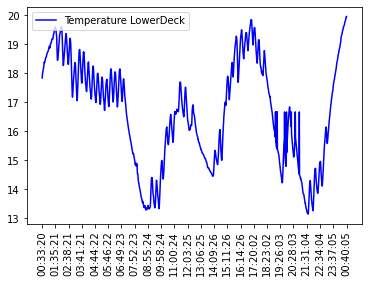

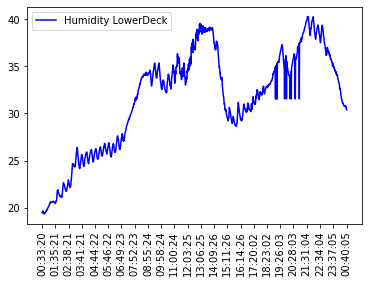

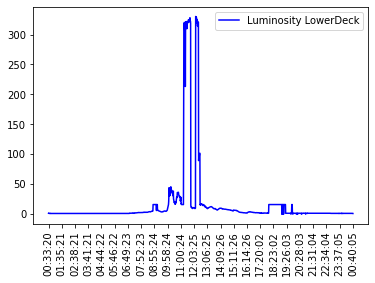

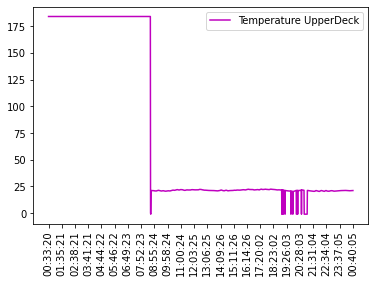

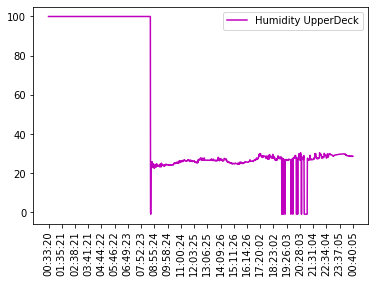

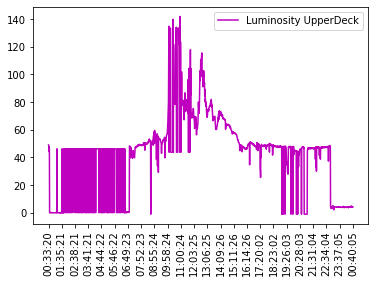

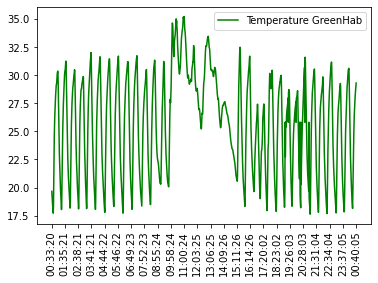

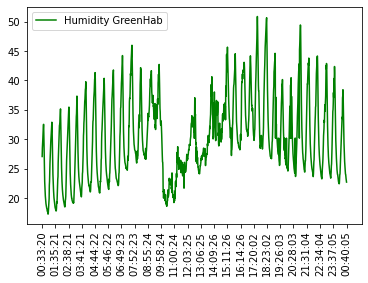

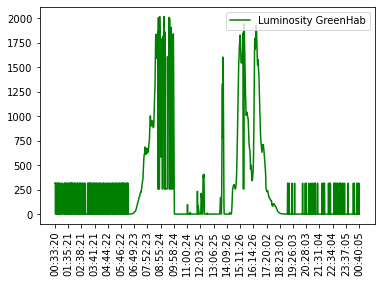

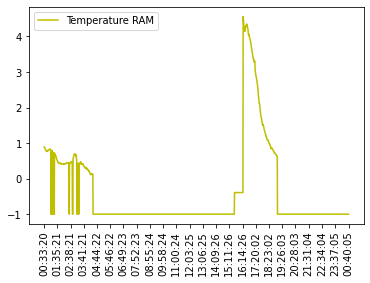

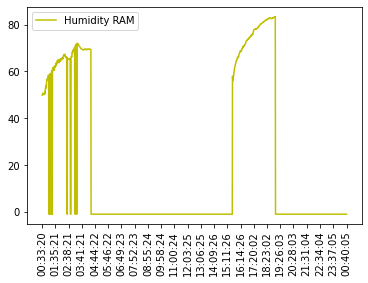

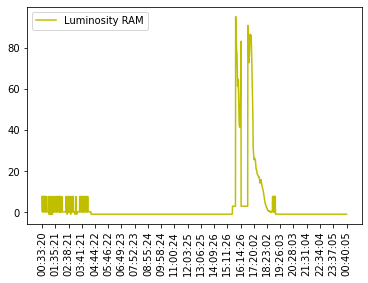

In [13]:
# Plots - Seulement sur les 3 grandeurs réellement utilisées : T, H et LUM

import matplotlib.pyplot as plt

### LowerDeck

plt.figure()
plt.plot(lowerdeck_df['LowerDeck T'],label='Temperature LowerDeck',c='b')
plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck T']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(lowerdeck_df['LowerDeck H'],label='Humidity LowerDeck',c='b')
plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck H']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(lowerdeck_df['LowerDeck LUM'],label='Luminosity LowerDeck',c='b')
plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck LUM']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

### UpperDeck

plt.figure()
plt.plot(upperdeck_df['UpperDeck T'],label='Temperature UpperDeck',c='m')
plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck T']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(upperdeck_df['UpperDeck H'],label='Humidity UpperDeck',c='m')
plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck H']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(upperdeck_df['UpperDeck LUM'],label='Luminosity UpperDeck',c='m')
plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck LUM']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

### GreenHab

plt.figure()
plt.plot(greenhab_df['GreenHab T'],label='Temperature GreenHab',c='g')
plt.xticks(np.linspace(0, len(greenhab_df['GreenHab T']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(greenhab_df['GreenHab H'],label='Humidity GreenHab',c='g')
plt.xticks(np.linspace(0, len(greenhab_df['GreenHab H']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(greenhab_df['GreenHab LUM'],label='Luminosity GreenHab',c='g')
plt.xticks(np.linspace(0, len(greenhab_df['GreenHab LUM']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

### RAM

plt.figure()
plt.plot(ram_df['RAM T'],label='Temperature RAM',c='y')
plt.xticks(np.linspace(0, len(ram_df['RAM T']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(ram_df['RAM H'],label='Humidity RAM',c='y')
plt.xticks(np.linspace(0, len(ram_df['RAM H']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

plt.figure()
plt.plot(ram_df['RAM LUM'],label='Luminosity RAM',c='y')
plt.xticks(np.linspace(0, len(ram_df['RAM LUM']) - 1, 24, dtype=int))
plt.xticks(rotation=90)
plt.legend()

# 4. Plots par zones sur la mission entière

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = './data/'

foldernames0 = []

for foldername in os.listdir(folder_path):
    foldernames0.append(foldername)
    
foldernames = foldernames0[9:15]
for i in range(9) :
    foldernames.append(foldernames0[i])
    
filesinfoldersnames = []
for foldername in foldernames :
    folder_path = './data/'+foldername
    filenames = []
    for filename in os.listdir(folder_path):
        filenames.append(filename)
    filesinfoldersnames.append(filenames)

In [15]:
print(foldernames)
# print(filesinfoldersnames[0])

['ENV_23-02-2023', 'ENV_24-02-2023', 'ENV_25-02-2023', 'ENV_26-02-2023', 'ENV_27-02-2023', 'ENV_28-02-2023', 'ENV_01-03-2023', 'ENV_02-03-2023', 'ENV_03-03-2023', 'ENV_04-03-2023', 'ENV_05-03-2023', 'ENV_06-03-2023', 'ENV_07-03-2023', 'ENV_08-03-2023', 'ENV_09-03-2023']


In [16]:
def excelToDataframe(filename) :
    rawdf = pd.read_excel(filename)
    
#     print('Processing file '+filename)
            
    nfeatures = rawdf.shape[1]-3
    nstamps = len(rawdf[rawdf.columns[0]].value_counts())
    nrows_per_stamp = len(rawdf[rawdf[rawdf.columns[0]] == str(rawdf[rawdf.columns[0]].iloc[-1])])
    nrows_total = rawdf.shape[0]
        
    numpydf = np.zeros((nstamps,nrows_per_stamp*nfeatures))
    row_labels = []
    columns_labels = ['ScienceDome T','LowerDeck T','UpperDeck T','GreenHab T','RAM T','ScienceDome P','LowerDeck P','UpperDeck P','GreenHab P','RAM P','ScienceDome H','LowerDeck H','UpperDeck H','GreenHab H','RAM H','ScienceDome V','LowerDeck V','UpperDeck V','GreenHab V','RAM V','ScienceDome FS','LowerDeck FS','UpperDeck FS','GreenHab FS','RAM FS','ScienceDome INF','LowerDeck INF','UpperDeck INF','GreenHab INF','RAM INF','ScienceDome LUM','LowerDeck LUM','UpperDeck LUM','GreenHab LUM','RAM LUM']

    current_stamp = 0
    row_counter = 0

    for row in range(nrows_total) :
        row_counter += 1

        for j in range(3,nfeatures+3) :

            x = rawdf.iloc[row,j]

            if isinstance(x,str) :
                x = float(x.replace(',','.'))
                numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x
            else :
                x = float(x)
                numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x

        if (row_counter >= nrows_per_stamp) :
            row_labels.append(rawdf[rawdf.columns[0]].iloc[int(current_stamp*nrows_total/nstamps)])
            current_stamp += 1
            row_counter = 0

    df = pd.DataFrame(numpydf)
    df.columns = columns_labels
    df.index = row_labels
    
    return(df)

def excelToCleanedDayDataframe(foldername) :
    
    filenames = []
    for filename in os.listdir('./data/'+foldername):
        filenames.append(filename)
    filenames.append(filenames)
    
    df = excelToDataframe('./data/'+foldername+'/'+filenames[0])
        
    for filename in filenames[1:-1] :
        
        rawdf = pd.read_excel('./data/'+foldername+'/'+filename)
        
#         print('Processing file: ./data/'+foldername+'/'+filename)
    
        nfeatures = rawdf.shape[1]-3
        nstamps = len(rawdf[rawdf.columns[0]].value_counts())
        nrows_per_stamp = len(rawdf[rawdf[rawdf.columns[0]] == str(rawdf[rawdf.columns[0]].iloc[-1])])
        nrows_total = rawdf.shape[0]

        numpydf = np.zeros((nstamps,nrows_per_stamp*nfeatures))
#         print("numpydf: "+str(nstamps)+" * "+str(nrows_per_stamp*nfeatures))
#         print("     nrows_per_stamp: "+str(nrows_per_stamp)+" nfeatures: "+str(nfeatures))
        row_labels = []
        columns_labels = ['ScienceDome T','LowerDeck T','UpperDeck T','GreenHab T','RAM T','ScienceDome P','LowerDeck P','UpperDeck P','GreenHab P','RAM P','ScienceDome H','LowerDeck H','UpperDeck H','GreenHab H','RAM H','ScienceDome V','LowerDeck V','UpperDeck V','GreenHab V','RAM V','ScienceDome FS','LowerDeck FS','UpperDeck FS','GreenHab FS','RAM FS','ScienceDome INF','LowerDeck INF','UpperDeck INF','GreenHab INF','RAM INF','ScienceDome LUM','LowerDeck LUM','UpperDeck LUM','GreenHab LUM','RAM LUM']

        current_stamp = 0
        row_counter = 0

        for row in range(nrows_total) :
            row_counter += 1

            for j in range(3,nfeatures+3) :

                x = rawdf.iloc[row,j]

                if isinstance(x,str) :
                    x = float(x.replace(',','.'))
                    numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x
                else :
                    x = float(x)
                    numpydf[current_stamp,j-3+nfeatures*(row_counter-1)] = x

            if (row_counter >= nrows_per_stamp) and current_stamp < nstamps :
                row_labels.append(rawdf[rawdf.columns[0]].iloc[int(current_stamp*nrows_total/nstamps)])
                current_stamp += 1
                row_counter = 0

        df2 = pd.DataFrame(numpydf)
        df2.columns = columns_labels
        df2.index = row_labels
        
        df = pd.concat([df,df2])
        
    # Pré-traitement

    # Formattage des indices des lignes
    df.index = df.index.str.replace(r'\d{2}-\d{2}-\d{2}_', '', regex=True)

    # On enlève les mesures de ScienceDome car le capteur est manifestement cassé (que des -1)
    df.drop(columns=df.filter(regex='^ScienceDome').columns, inplace=True)

    # On remplace les NaN et les inf par des valeurs moyennes
    for column in df.columns :
        mean_value = df[column][~(np.isnan(df[column]) | np.isinf(df[column]))].mean()
        df[column].replace([np.nan, np.inf, -np.inf], mean_value, inplace=True)

        # On remplace les valeurs aberrantes par des valeurs moyennes (qui n'en tiennent pas compte)
        mean_value = df[column][~(np.abs(df[column] - df[column].mean()) > 3 * df[column].std())].mean()
        outliers = np.abs(df[column] - df[column].mean()) > 3 * df[column].std()
        df.loc[outliers, column] = mean_value
        
    return(df)

In [17]:
def splitZones(df) :
    lowerdeck_columns = [col for col in df.columns if col.startswith('LowerDeck')]
    lowerdeck_df = df[lowerdeck_columns].copy()

    upperdeck_columns = [col for col in df.columns if col.startswith('UpperDeck')]
    upperdeck_df = df[upperdeck_columns].copy()

    greenhab_columns = [col for col in df.columns if col.startswith('GreenHab')]
    greenhab_df = df[greenhab_columns].copy()

    ram_columns = [col for col in df.columns if col.startswith('RAM')]
    ram_df = df[ram_columns].copy()
    
    return (lowerdeck_df, upperdeck_df, greenhab_df, ram_df)

def plotZones(lowerdeck_df,upperdeck_df,greenhab_df,ram_df,day) :
    plt.figure()
    plt.plot(lowerdeck_df['LowerDeck T'],label='Temperature LowerDeck',c='b')
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck T']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(lowerdeck_df['LowerDeck H'],label='Humidity LowerDeck',c='b')
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck H']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(lowerdeck_df['LowerDeck LUM'],label='Luminosity LowerDeck',c='b')
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck LUM']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    ### UpperDeck

    plt.figure()
    plt.plot(upperdeck_df['UpperDeck T'],label='Temperature UpperDeck',c='m')
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck T']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(upperdeck_df['UpperDeck H'],label='Humidity UpperDeck',c='m')
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck H']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(upperdeck_df['UpperDeck LUM'],label='Luminosity UpperDeck',c='m')
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck LUM']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    ### GreenHab

    plt.figure()
    plt.plot(greenhab_df['GreenHab T'],label='Temperature GreenHab',c='g')
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab T']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(greenhab_df['GreenHab H'],label='Humidity GreenHab',c='g')
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab H']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(greenhab_df['GreenHab LUM'],label='Luminosity GreenHab',c='g')
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab LUM']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    ### RAM

    plt.figure()
    plt.plot(ram_df['RAM T'],label='Temperature RAM',c='y')
    plt.xticks(np.linspace(0, len(ram_df['RAM T']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(ram_df['RAM H'],label='Humidity RAM',c='y')
    plt.xticks(np.linspace(0, len(ram_df['RAM H']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)

    plt.figure()
    plt.plot(ram_df['RAM LUM'],label='Luminosity RAM',c='y')
    plt.xticks(np.linspace(0, len(ram_df['RAM LUM']) - 1, 24, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Day '+day)
    
def plotZonesWeeks(lowerdeck_df,upperdeck_df,greenhab_df,ram_df) :
    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(lowerdeck_df.index, lowerdeck_df['LowerDeck T'],label='Temperature LowerDeck',c='b',s=5)
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(lowerdeck_df.index, lowerdeck_df['LowerDeck H'],label='Humidity LowerDeck',c='b',s=5)
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(lowerdeck_df.index, lowerdeck_df['LowerDeck LUM'],label='Luminosity LowerDeck',c='b',s=5)
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    ### UpperDeck

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(upperdeck_df.index,upperdeck_df['UpperDeck T'],label='Temperature UpperDeck',c='m',s=5)
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(upperdeck_df.index,upperdeck_df['UpperDeck H'],label='Humidity UpperDeck',c='m',s=5)
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(upperdeck_df.index,upperdeck_df['UpperDeck LUM'],label='Luminosity UpperDeck',c='m',s=5)
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    ### GreenHab

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(greenhab_df.index,greenhab_df['GreenHab T'],label='Temperature Greenhab',c='g',s=5)
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(greenhab_df.index,greenhab_df['GreenHab H'],label='Humidity Greenhab',c='g',s=5)
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(greenhab_df.index,greenhab_df['GreenHab LUM'],label='Luminosity Greenhab',c='g',s=5)
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    ### RAM

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(ram_df.index,ram_df['RAM T'],label='Temperature RAM',c='y',s=5)
    plt.xticks(np.linspace(0, len(ram_df['RAM T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(ram_df.index,ram_df['RAM H'],label='Humidity RAM',c='y',s=5)
    plt.xticks(np.linspace(0, len(ram_df['RAM H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(ram_df.index,ram_df['RAM LUM'],label='Luminosity RAM',c='y',s=5)
    plt.xticks(np.linspace(0, len(ram_df['RAM LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

In [18]:
# Uncomment to test on day 01-03-2023

# df = excelToCleanedDayDataframe(foldernames[6])
# z = splitZones(df)
# plotZones(z[0],z[1],z[2],z[3],'01-03-2023')

In [19]:
# Uncomment to test on March week

# for foldername in foldernames[6:] :
#     print('*** Processing folder : ./data/'+foldername)
#     df = excelToCleanedDayDataframe(foldername)
#     z = splitZones(df)
#     plotZones(z[0],z[1],z[2],z[3],foldername[4:])

*** Processing folder : ./data/ENV_24-02-2023
*** Processing folder : ./data/ENV_25-02-2023
*** Processing folder : ./data/ENV_26-02-2023
*** Processing folder : ./data/ENV_27-02-2023
*** Processing folder : ./data/ENV_28-02-2023
*** Processing folder : ./data/ENV_01-03-2023
*** Processing folder : ./data/ENV_02-03-2023
*** Processing folder : ./data/ENV_03-03-2023
*** Processing folder : ./data/ENV_04-03-2023
*** Processing folder : ./data/ENV_05-03-2023
*** Processing folder : ./data/ENV_06-03-2023
*** Processing folder : ./data/ENV_07-03-2023
*** Processing folder : ./data/ENV_08-03-2023
*** Processing folder : ./data/ENV_09-03-2023



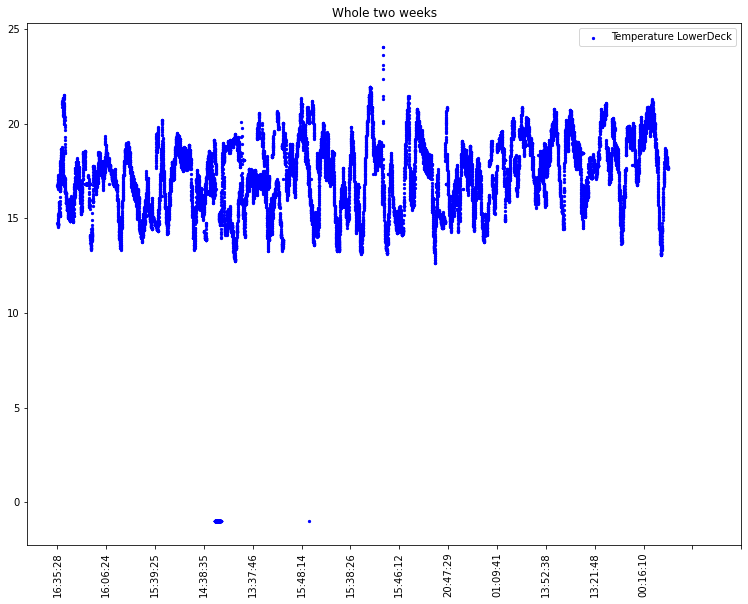

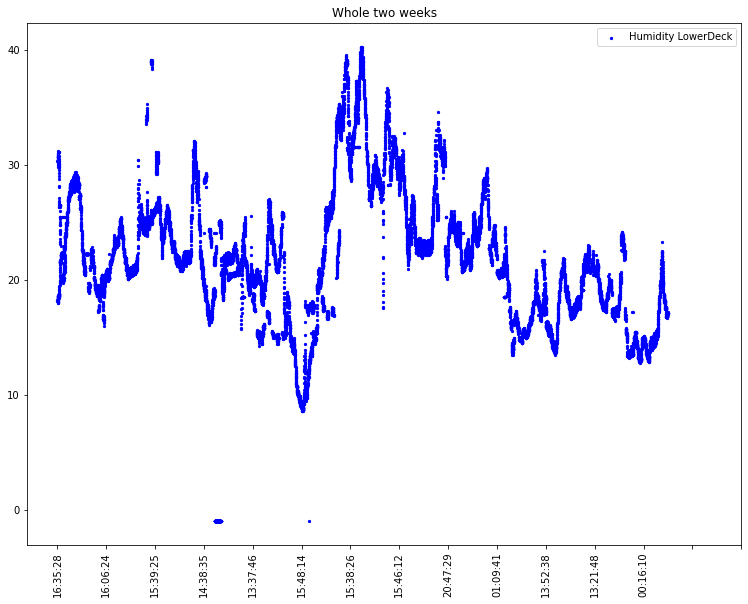

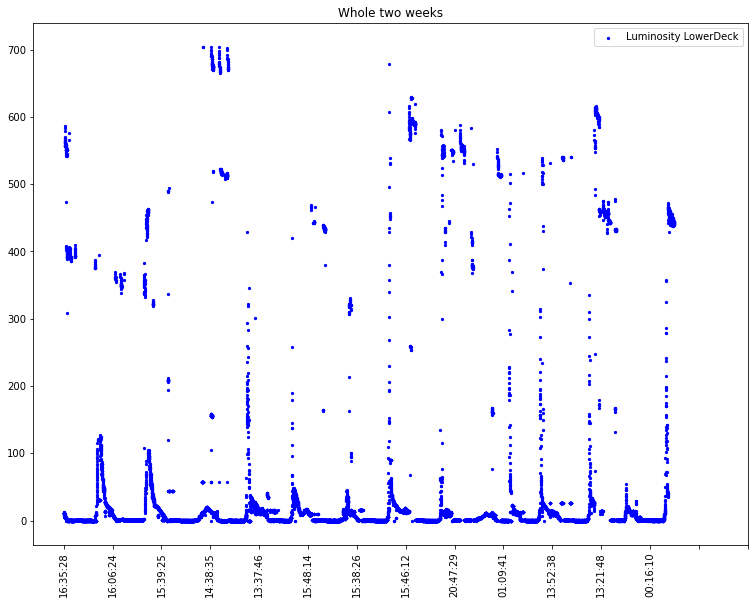

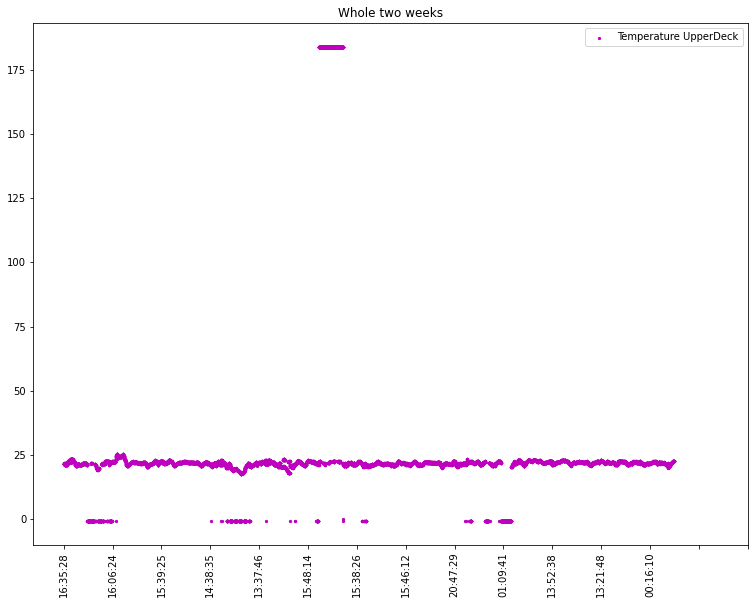

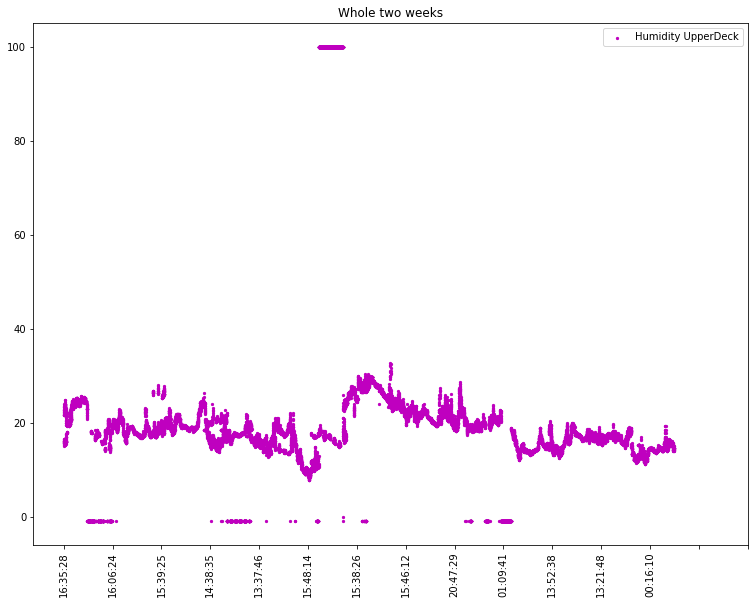

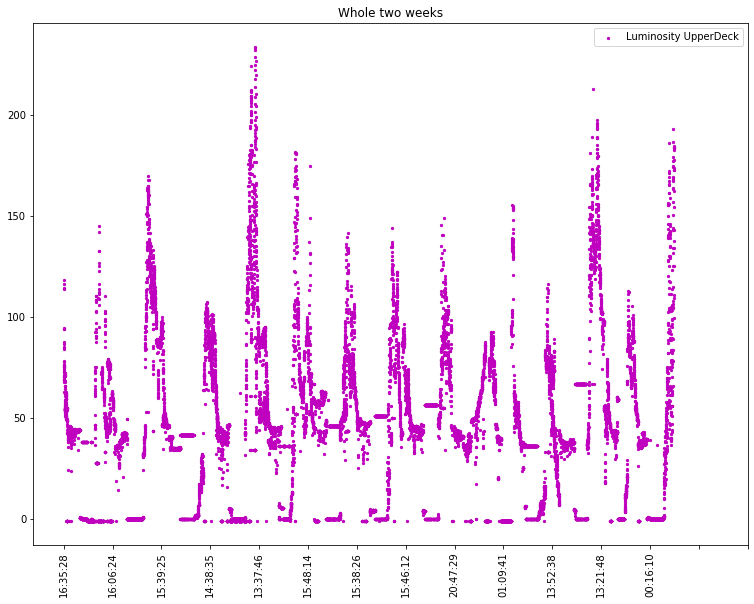

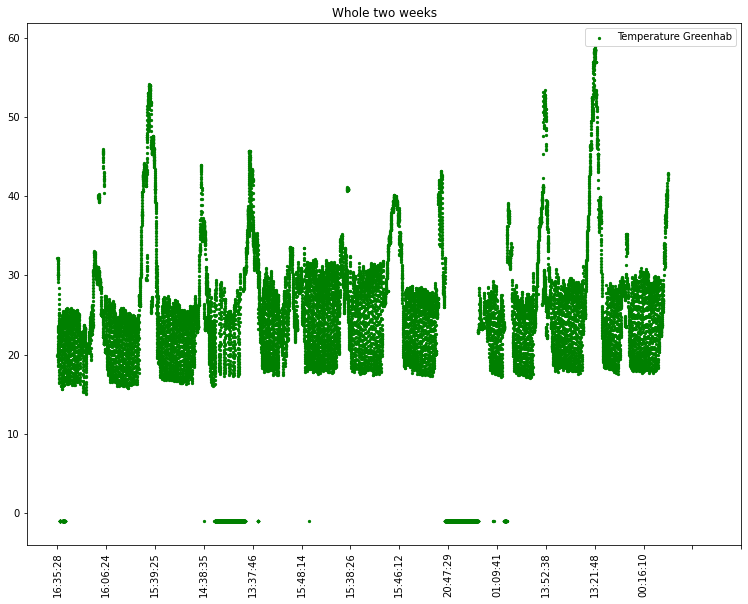

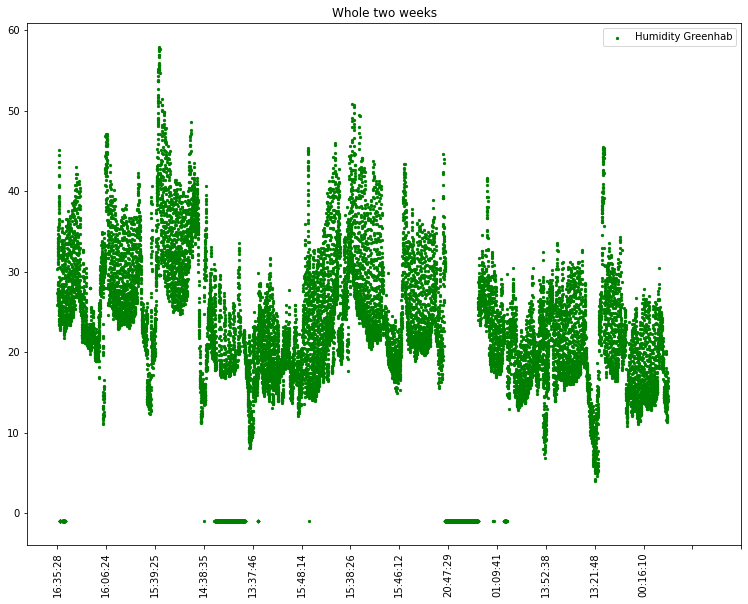

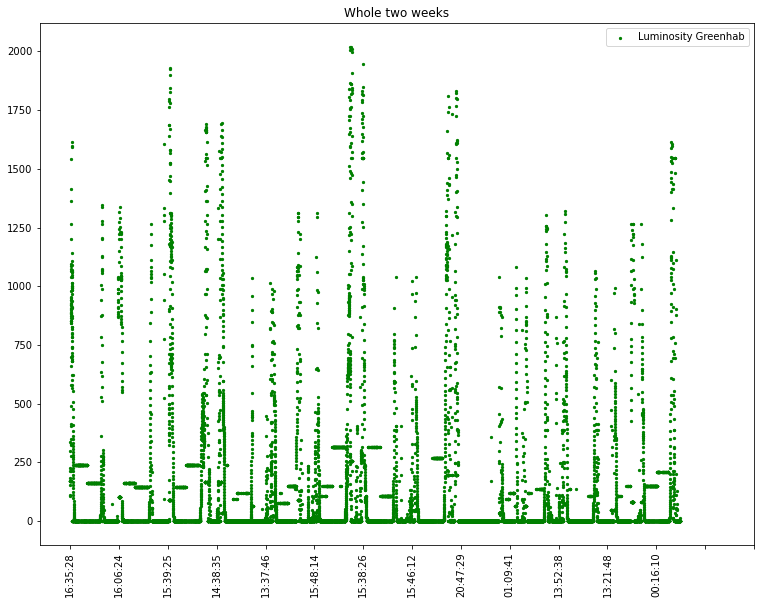

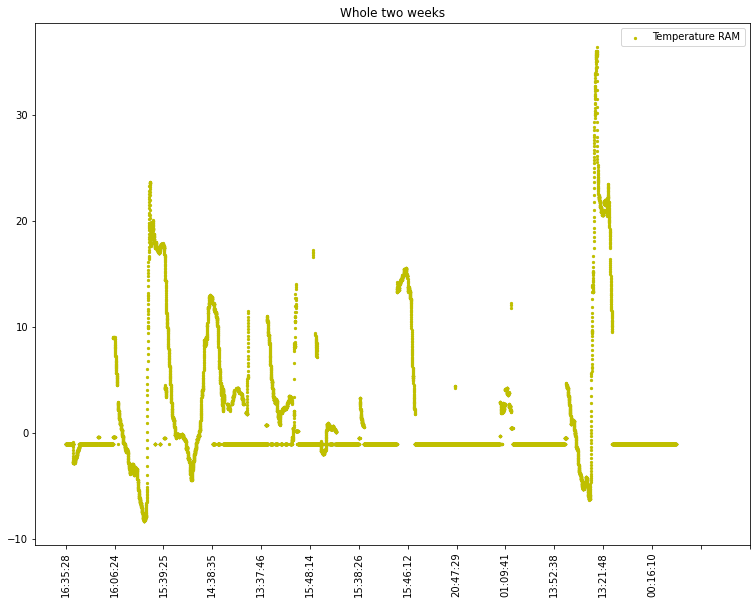

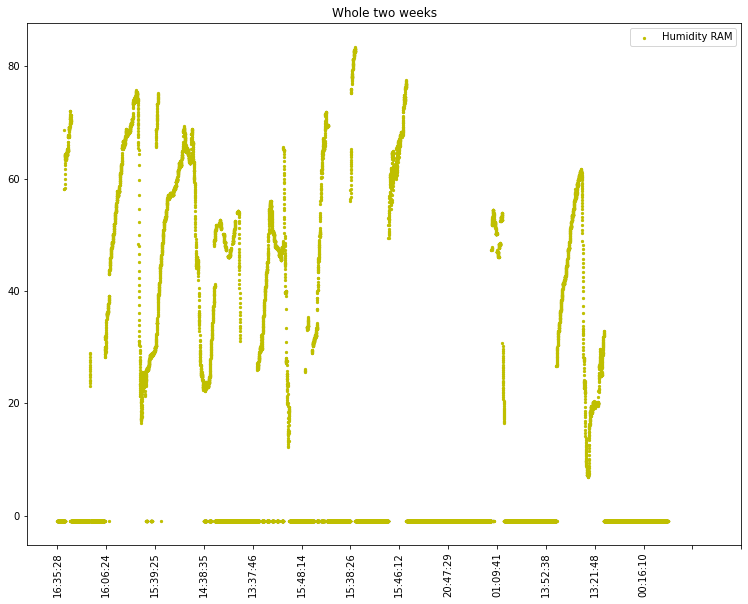

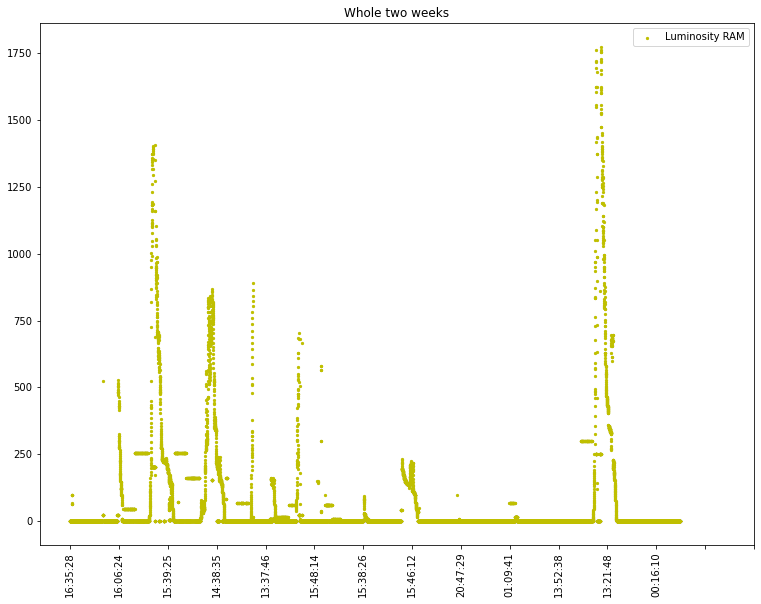

In [65]:
from tqdm.notebook import tqdm_notebook

df = excelToCleanedDayDataframe(foldernames[0])

for i in tqdm_notebook(range(1,len(foldernames))) :
    foldername = foldernames[i]
    print('*** Processing folder : ./data/'+foldername)
    dfday = excelToCleanedDayDataframe(foldername)
    df = pd.concat([df, dfday])
    
#     To plot each day separately :
#     z = splitZones(df)
#     plotZones(z[0],z[1],z[2],z[3],foldername[4:])

# To plot values during the two weeks:
z = splitZones(df)
plotZonesWeeks(z[0],z[1],z[2],z[3])

# Suppression des valeurs aberrantes / nettoyage des données (sur la semaine entière)

In [82]:
def secondCleanDatasetColumn(dfcol) : # second round of cleaning (based on full mission dat)
    
    # mean / std clean
    mean = dfcol.mean()
    std = dfcol.std()
    isNotAberrant = [True for i in range(len(dfcol))]
    for i in range(len(dfcol)) :
        if dfcol.iloc[i] > mean + 3*std or dfcol.iloc[i] < mean - 3*std :
            isNotAberrant[i] = False
    
    isNotAberrant = np.array(isNotAberrant)
    correctmean = np.mean(dfcol.loc[isNotAberrant])
    dfcol.loc[~isNotAberrant] = correctmean
    
    # -1 and 0 values clean
    mask = dfcol != -1
    dfcol = dfcol.replace(-1, correctmean)
    dfcol = dfcol.replace(0, correctmean)
    
    return dfcol

Text(0.5, 1.0, 'Whole two weeks')

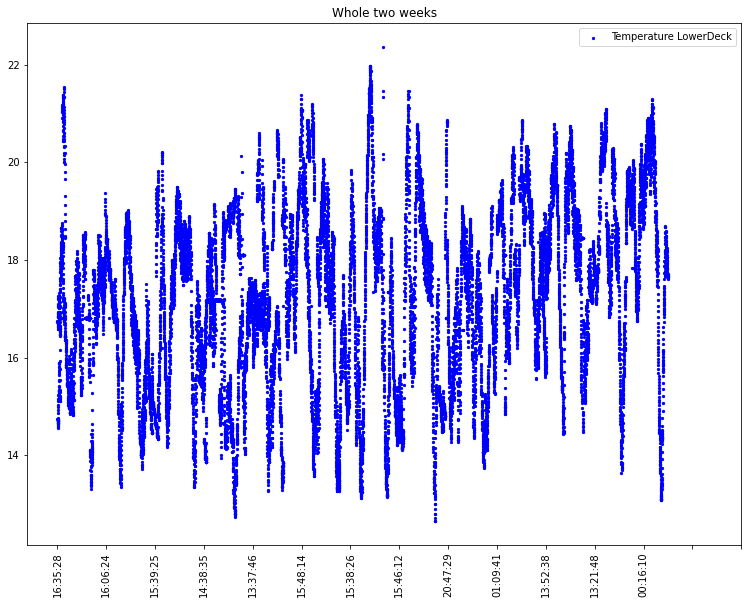

In [83]:
lowerdeck_df_cleaned = secondCleanDatasetColumn(z[0]['LowerDeck T'])
plt.figure(figsize=(12.8, 9.6))
plt.scatter(lowerdeck_df_cleaned.index, lowerdeck_df_cleaned,label='Temperature LowerDeck',c='b',s=5)
plt.xticks(np.linspace(0, len(lowerdeck_df_cleaned) - 1, 15, dtype=int))
plt.xticks(rotation=90)
plt.legend()
plt.title('Whole two weeks')

*** Processing folder : ./data/ENV_24-02-2023
*** Processing folder : ./data/ENV_25-02-2023
*** Processing folder : ./data/ENV_26-02-2023
*** Processing folder : ./data/ENV_27-02-2023
*** Processing folder : ./data/ENV_28-02-2023
*** Processing folder : ./data/ENV_01-03-2023
*** Processing folder : ./data/ENV_02-03-2023
*** Processing folder : ./data/ENV_03-03-2023
*** Processing folder : ./data/ENV_04-03-2023
*** Processing folder : ./data/ENV_05-03-2023
*** Processing folder : ./data/ENV_06-03-2023
*** Processing folder : ./data/ENV_07-03-2023
*** Processing folder : ./data/ENV_08-03-2023
*** Processing folder : ./data/ENV_09-03-2023



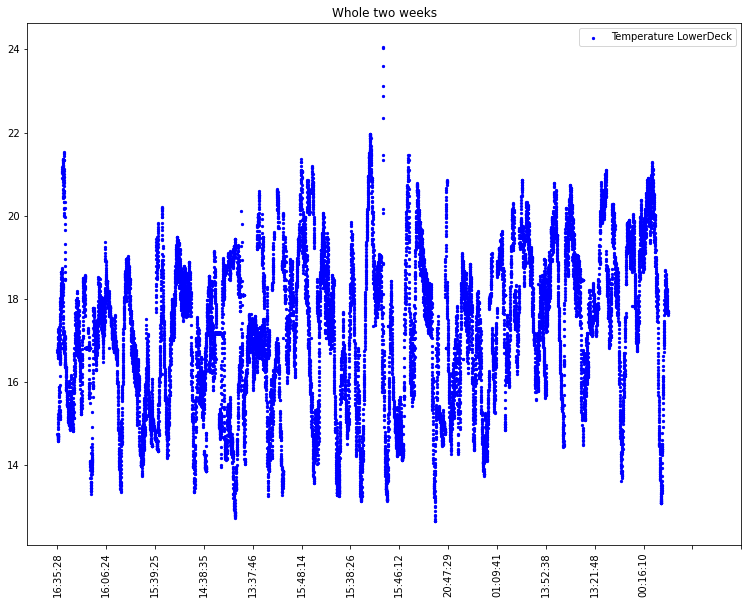

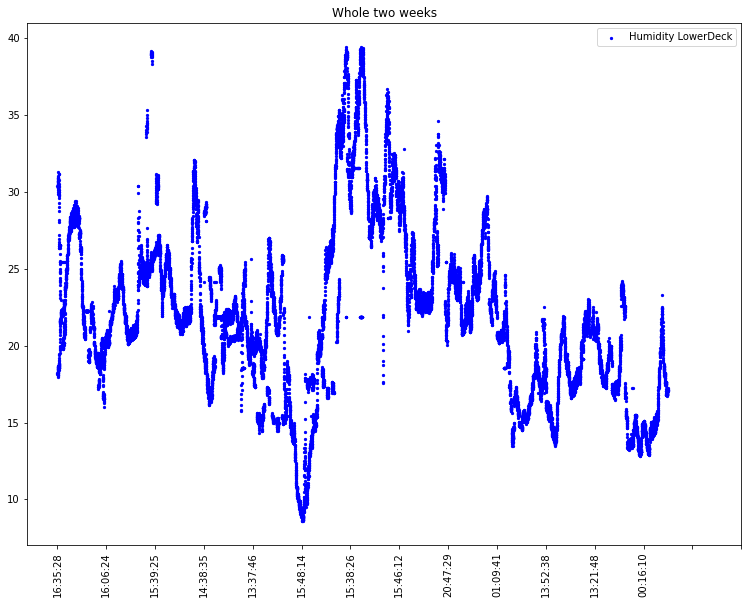

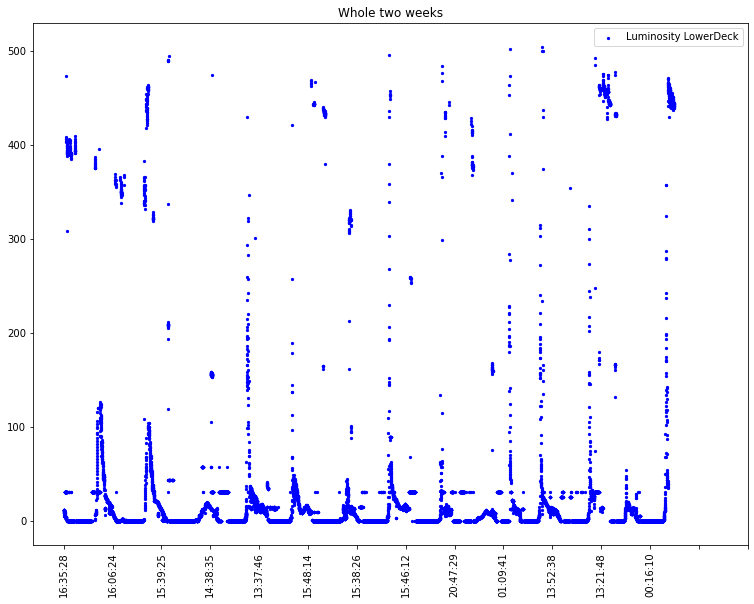

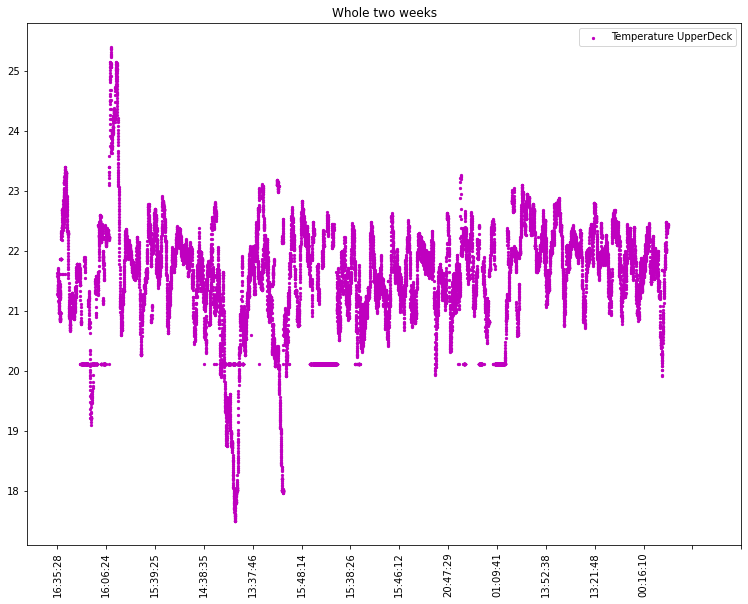

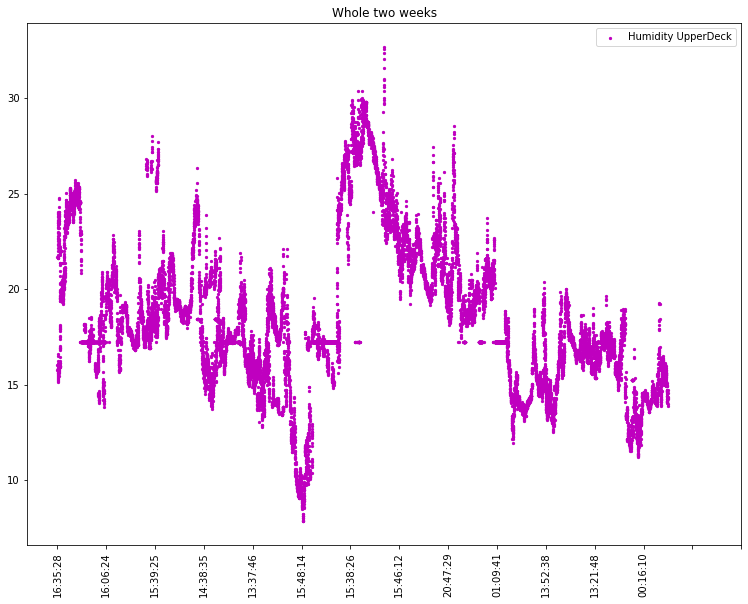

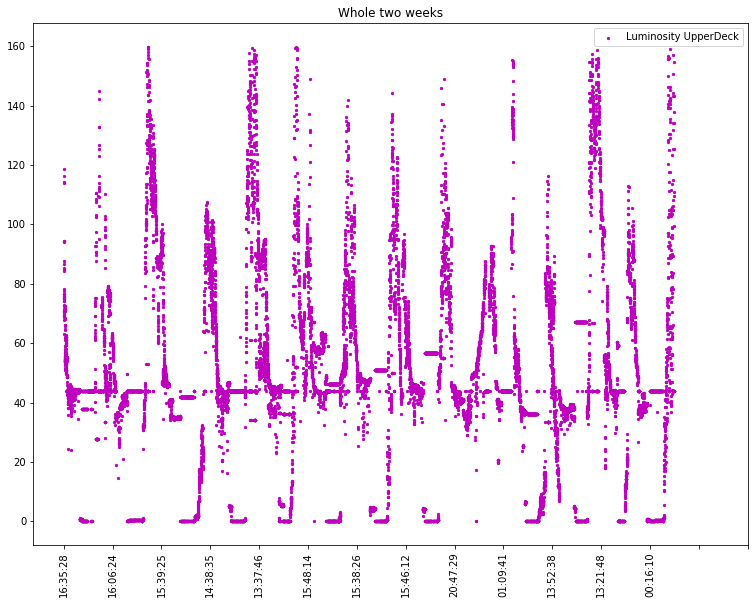

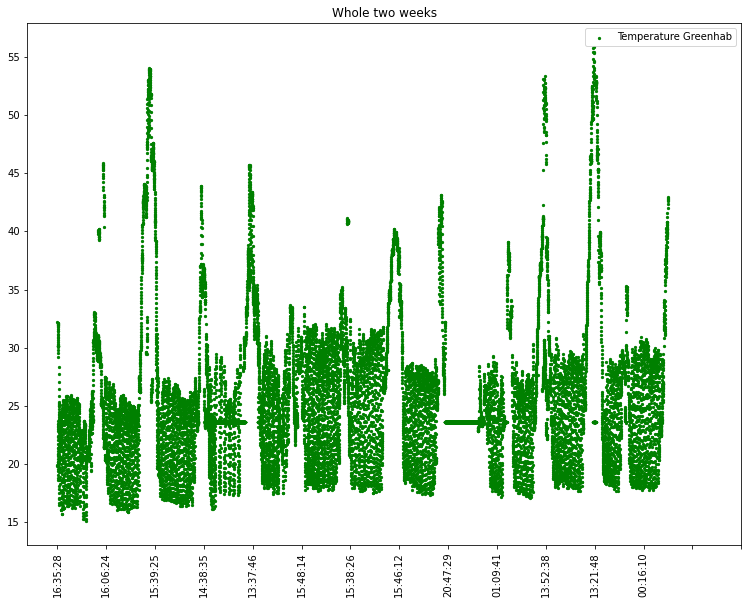

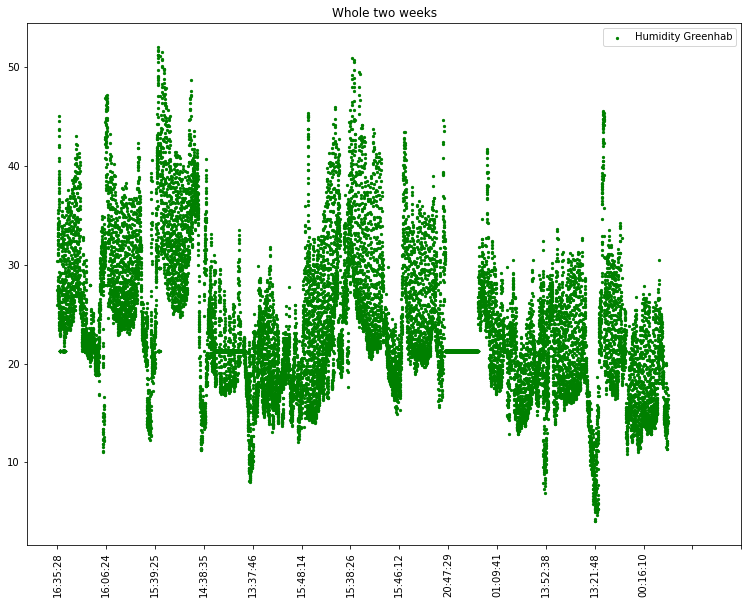

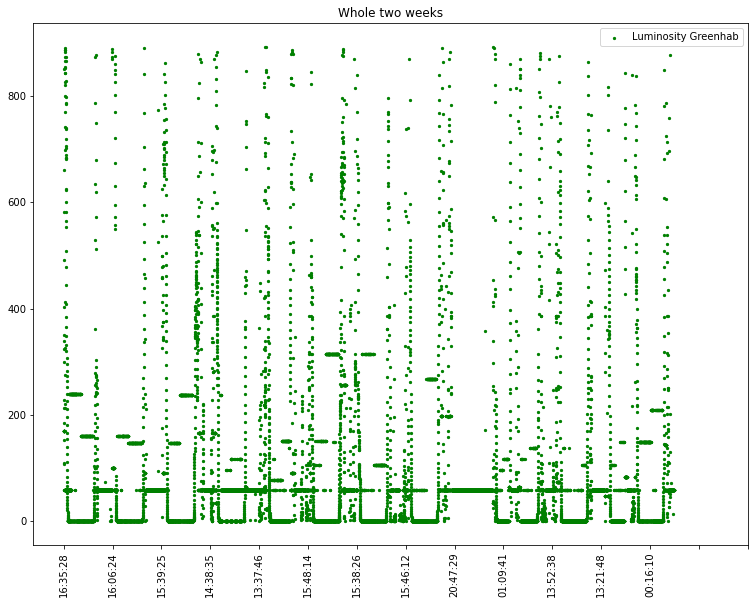

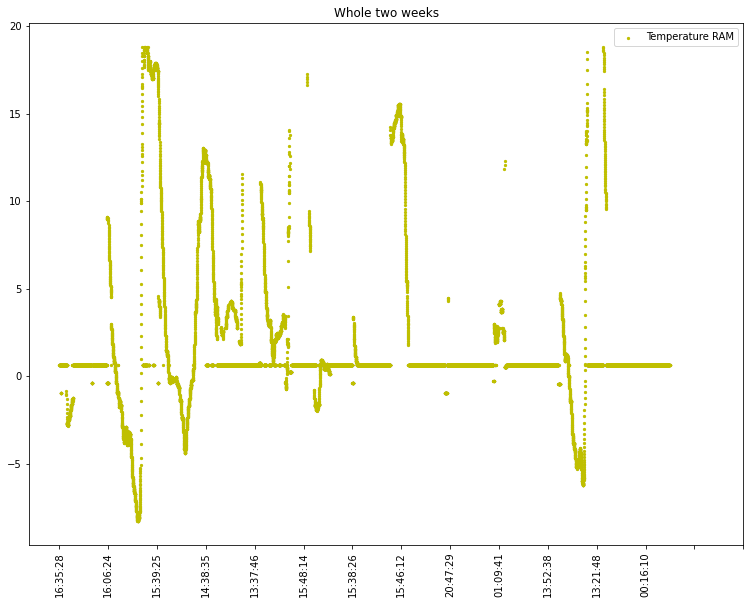

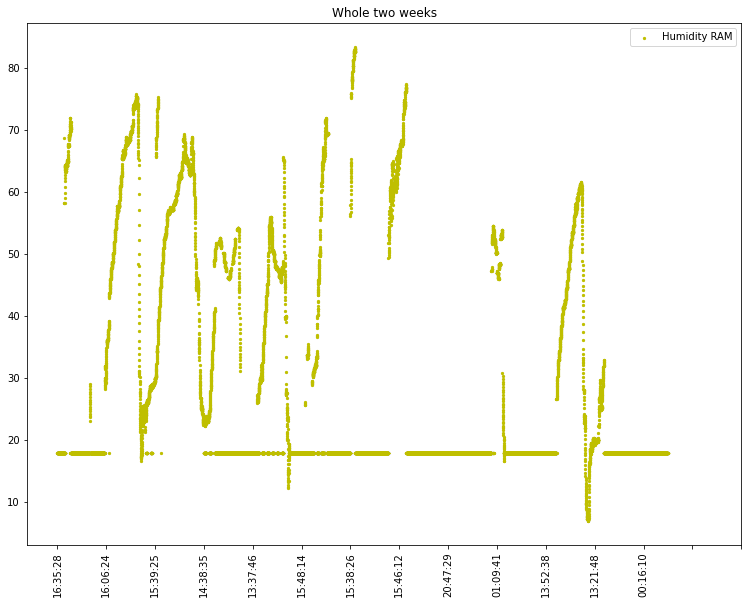

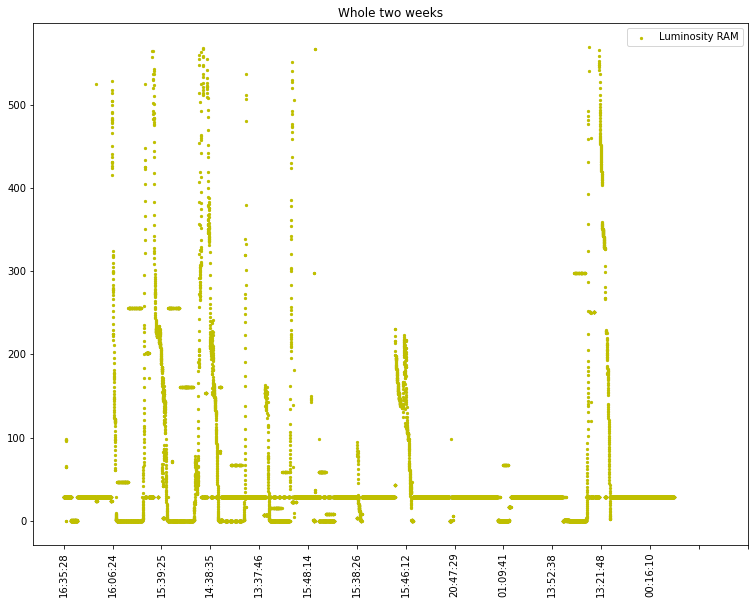

In [84]:
df = excelToCleanedDayDataframe(foldernames[0])

for i in tqdm_notebook(range(1,len(foldernames))) :
    foldername = foldernames[i]
    print('*** Processing folder : ./data/'+foldername)
    dfday = excelToCleanedDayDataframe(foldername)
    df = pd.concat([df, dfday])

# Perform second cleaning
for col in df :
    df[col] = secondCleanDatasetColumn(df[col])

# To plot values during the two weeks:
z = splitZones(df)
plotZonesWeeks(z[0],z[1],z[2],z[3])

# Création d'un dataset résumé

In [105]:
statsdf = pd.DataFrame(df.describe().loc[['mean', 'std', 'min', 'max','50%']])
statsdf.index=['Moyenne','Ecart-type','Min','Max','Médiane']

In [106]:
statsdf

,LowerDeck T,UpperDeck T,GreenHab T,RAM T,LowerDeck P,UpperDeck P,GreenHab P,RAM P,LowerDeck H,UpperDeck H,...,GreenHab FS,RAM FS,LowerDeck INF,UpperDeck INF,GreenHab INF,RAM INF,LowerDeck LUM,UpperDeck LUM,GreenHab LUM,RAM LUM
Moyenne,17.188182,21.492824,26.110032,1.622444,8584.126291,8524.571642,8498.687642,5386.028683,21.891430,18.395456,...,16382.957293,849.342017,178.642990,169.376807,17973.341709,388.267925,32.339785,49.978711,79.224243,45.990968
Ecart-type,1.826367,0.943999,6.614020,4.067002,41.595391,177.839986,276.145999,2557.138592,5.448986,3.822026,...,16367.643008,1662.331630,260.430951,155.130523,12865.294225,687.977485,92.053176,30.126120,134.181091,75.849630
Min,12.650000,17.490000,15.040000,-8.290000,8494.850000,8005.356996,7697.567657,3343.867840,8.570000,7.830000,...,1.000000,-0.590437,1.000000,1.000000,1.000000,-0.796258,0.050000,0.050000,0.010000,-0.789575
Max,24.060000,25.410000,55.890000,18.810000,8678.570000,8674.650000,8686.940000,8681.460000,39.440000,32.690000,...,37889.000000,13745.000000,1104.000000,798.000000,37889.000000,5848.000000,503.980000,159.730000,891.800000,569.760000
Médiane,17.250000,21.650000,24.250000,0.631081,8584.710000,8578.580000,8583.580000,3343.867840,21.490000,17.470000,...,13841.290731,514.027919,109.000000,143.547942,12024.927088,213.632049,2.545000,44.037067,58.757664,28.083356


# Anomaly detection

In [107]:
def findMeanExtremes(dfcol) :
    mean = dfcol.mean()
    std = dfcol.std()
    isAberrant = []
    for i in range(len(dfcol)) :
        if dfcol.iloc[i] > mean + 3*std or dfcol.iloc[i] < mean - 3*std :
            isAberrant.append(True)
        else :
            isAberrant.append(False)
    return isAberrant

In [127]:
from sklearn.svm import OneClassSVM

def findOneClassSVMExtremes(dfcol) :
    svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.01)
    svm.fit(dfcol.values.reshape(-1,1))
    pred = svm.predict(dfcol.values.reshape(-1,1))
    isAberrant = []
    for i in range(len(pred)) :
        if pred[i] == -1 :
            isAberrant.append(True)
        else :
            isAberrant.append(False)
    return isAberrant

In [137]:
from sklearn.cluster import KMeans

def findClusterExtremes(dfcol) :
    nclust = 4
    percentageExpected = 0.05
    
    kmeans = KMeans(n_clusters=nclust)
    kmeans.fit(dfcol.values.reshape(-1,1))

    # Calculer les distances des points au centroïde le plus proche
    distances = kmeans.transform(dfcol.values.reshape(-1,1)).min(axis=1)

    # Identifier les points anormaux (les points éloignés)
    threshold = np.percentile(distances, 100*(1-percentageExpected))

    isAbnormal = []
    for i in range(len(dfcol)) :
        if distances[i] > threshold :
            isAbnormal.append(True)
        else :
            isAbnormal.append(False)
        
    return isAbnormal

In [148]:
def findAnomaliesColumn(dfcol,verbose=False) : # n'accepte qu'un dataset colonne en input
    isMeanAberrant = findMeanExtremes(dfcol)
    isOneClassSVMAberrant = findOneClassSVMExtremes(dfcol)
    isClusterAberrant = findClusterExtremes(dfcol)
        
    isAbnormalIndex = []
    
    aberrantcounter = 0
    for i in range(len(dfcol)) :
        if isMeanAberrant[i] :
            aberrantcounter += 1
        if isOneClassSVMAberrant[i] :
            aberrantcounter += 1
        if isClusterAberrant[i] :
            aberrantcounter += 1
        if aberrantcounter > 2 :
            isAbnormalIndex.append(i)
        aberrantcounter = 0
    
    if verbose :
        for i, val in enumerate(isAbnormalIndex) :
            print("Outlier trouvé : "+str(dfcol[isAbnormalIndex[i]]))
    
    return isAbnormalIndex

In [152]:
def plotZonesWeeksOutliers(lowerdeck_df,upperdeck_df,greenhab_df,ram_df,isAberrantIndexZ) :
    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(lowerdeck_df.index, lowerdeck_df['LowerDeck T'],label='Temperature LowerDeck',c='b',s=5)
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(lowerdeck_df.index, lowerdeck_df['LowerDeck H'],label='Humidity LowerDeck',c='b',s=5)
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(lowerdeck_df.index, lowerdeck_df['LowerDeck LUM'],label='Luminosity LowerDeck',c='b',s=5)
    plt.xticks(np.linspace(0, len(lowerdeck_df['LowerDeck LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    ### UpperDeck

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(upperdeck_df.index,upperdeck_df['UpperDeck T'],label='Temperature UpperDeck',c='m',s=5)
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(upperdeck_df.index,upperdeck_df['UpperDeck H'],label='Humidity UpperDeck',c='m',s=5)
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(upperdeck_df.index,upperdeck_df['UpperDeck LUM'],label='Luminosity UpperDeck',c='m',s=5)
    plt.xticks(np.linspace(0, len(upperdeck_df['UpperDeck LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    ### GreenHab

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(greenhab_df.index,greenhab_df['GreenHab T'],label='Temperature Greenhab',c='g',s=5)
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(greenhab_df.index,greenhab_df['GreenHab H'],label='Humidity Greenhab',c='g',s=5)
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(greenhab_df.index,greenhab_df['GreenHab LUM'],label='Luminosity Greenhab',c='g',s=5)
    plt.xticks(np.linspace(0, len(greenhab_df['GreenHab LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    ### RAM

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(ram_df.index,ram_df['RAM T'],label='Temperature RAM',c='y',s=5)
    plt.xticks(np.linspace(0, len(ram_df['RAM T']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(ram_df.index,ram_df['RAM H'],label='Humidity RAM',c='y',s=5)
    plt.xticks(np.linspace(0, len(ram_df['RAM H']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

    plt.figure(figsize=(12.8, 9.6))
    plt.scatter(ram_df.index,ram_df['RAM LUM'],label='Luminosity RAM',c='y',s=5)
    plt.xticks(np.linspace(0, len(ram_df['RAM LUM']) - 1, 15, dtype=int))
    plt.xticks(rotation=90)
    plt.legend()
    plt.title('Whole two weeks')

In [153]:
df = excelToCleanedDayDataframe(foldernames[0])

for i in tqdm_notebook(range(1,len(foldernames))) :
    foldername = foldernames[i]
    print('*** Processing folder : ./data/'+foldername)
    dfday = excelToCleanedDayDataframe(foldername)
    df = pd.concat([df, dfday])

# Perform second cleaning and find outliers
isAberrantIndexZ = []
for col in df :
    df[col] = secondCleanDatasetColumn(df[col])
    print('* Looking for outliers in '+str(col))
#     isAberrantIndex = findAnomaliesColumn(df[col],verbose=True)
    isAberrantIndex = findAnomaliesColumn(df[col])
    isAberrantIndexZ.append(isAberrantIndex)
    
# To plot values during the two weeks:
z = splitZones(df)
# plotZonesWeeksOutliers(z[0],z[1],z[2],z[3],isAberrantIndexZ) ### A TERMINER ### 

*** Processing folder : ./data/ENV_24-02-2023
*** Processing folder : ./data/ENV_25-02-2023
*** Processing folder : ./data/ENV_26-02-2023
*** Processing folder : ./data/ENV_27-02-2023
*** Processing folder : ./data/ENV_28-02-2023
*** Processing folder : ./data/ENV_01-03-2023
*** Processing folder : ./data/ENV_02-03-2023
*** Processing folder : ./data/ENV_03-03-2023
*** Processing folder : ./data/ENV_04-03-2023
*** Processing folder : ./data/ENV_05-03-2023
*** Processing folder : ./data/ENV_06-03-2023
*** Processing folder : ./data/ENV_07-03-2023
*** Processing folder : ./data/ENV_08-03-2023
*** Processing folder : ./data/ENV_09-03-2023

* Looking for outliers in LowerDeck T
* Looking for outliers in UpperDeck T
* Looking for outliers in GreenHab T
* Looking for outliers in RAM T
* Looking for outliers in LowerDeck P
* Looking for outliers in UpperDeck P
* Looking for outliers in GreenHab P
* Looking for outliers in RAM P
* Looking for outliers in LowerDeck H
* Looking for outliers in U